# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

df = pd.DataFrame(total_data)
total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.shape

(48895, 16)

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df.isnull

<bound method DataFrame.isnull of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

In [43]:
duplicates = df.duplicated(subset='host_id', keep=False)

# Filter the DataFrame to show only duplicated rows based on 'host_id'
df_duplicates = df[duplicates]

# Display the duplicated rows
print(df_duplicates.sort_values(by='host_id'))



KeyError: Index(['host_id'], dtype='object')

In [8]:
# addressing duplicates with the dataset

print(f"The number of duplicated Name records is: {total_data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {total_data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {total_data['id'].duplicated().sum()}")

'''
Replicated Name records is difficult to remove as it could simply mean that an Airbnb host has multiple listings and therefore appears various times.
After browsing the host_id duplicates the same appears to be happening, still valuable to the EDA as they represents a separate listing within the same
property or location under the same host.  The id doens't have any duplicates and serves little purpose, let's drop it.
'''

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


"\nReplicated Name records is difficult to remove as it could simply mean that an Airbnb host has multiple listings and therefore appears various times.\nAfter browsing the host_id duplicates the same appears to be happening, still valuable to the EDA as they represents a separate listing within the same\nproperty or location under the same host.  The id doens't have any duplicates and serves little purpose, let's drop it.\n"

In [9]:
# ridding of columns not pertaining to my predictive analysis
df.drop(["id", "host_id", "name", "last_review", "reviews_per_month", "host_name", "latitude", "longitude", "availability_365"], axis= 1, inplace= True)
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,Brooklyn,Kensington,Private room,149,1,9,6
1,Manhattan,Midtown,Entire home/apt,225,1,45,2
2,Manhattan,Harlem,Private room,150,3,0,1
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1
...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2
48891,Brooklyn,Bushwick,Private room,40,4,0,2
48892,Manhattan,Harlem,Entire home/apt,115,10,0,1
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,6


8 Categorical Columns: (id, name, host_id, host_name, neighborhood_group, neighbourhood, room_type, availability_365)
8 Numerical Columns: (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count)

In [10]:
df.nunique()

neighbourhood_group                 5
neighbourhood                     221
room_type                           3
price                             674
minimum_nights                    109
number_of_reviews                 394
calculated_host_listings_count     47
dtype: int64

In [11]:
# Different types of 'rooms' available
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [12]:
# Analysis of prices
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()
print(f"The least expensive property is {min_price}, while the most expensive is {max_price}.  Finally, the average price within the data set is {mean_price}")

# Replacing the 10 listings with a value of 0 for price with the median price ($152.72)
# df['price'] = df['price'].replace(0, mean_price) # 



The least expensive property is 0, while the most expensive is 10000.  Finally, the average price within the data set is 152.7206871868289



price_range
0-50           5027
51-100        16850
101-150       10033
151-200        7200
201-250        3559
251-300        2308
301-500        2683
501-1000        937
1001-2000       188
2001-4000        75
4001-6000        17
6001-8000        10
8001-10001        8
Name: count, dtype: int64


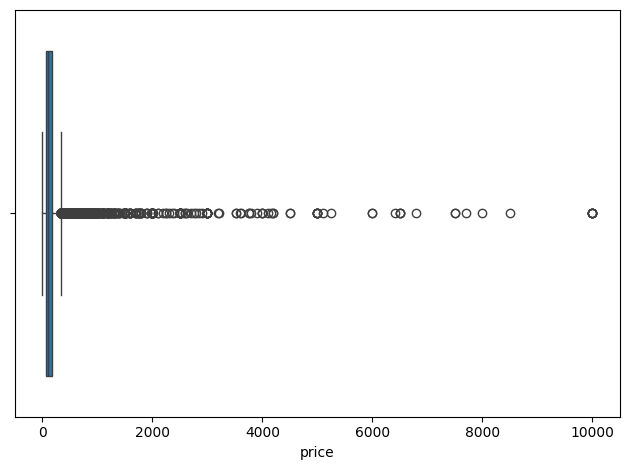

In [13]:
sns.boxplot(x=df['price'])

# Looking into the ranges of prices
bins = [0, 50, 100, 150, 200, 250, 300, 500, 1000, 2000, 4000, 6000, 8000, 10001]
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-500', '501-1000', '1001-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10001' ]
df['price_range'] = pd.cut(df['price'], bins=bins, labels=bin_labels, right=False)
value_counts = df['price_range'].value_counts().sort_index()
plt.tight_layout()
print()
print(value_counts)

In [14]:
'''
Experimenting and noting various sorted datasets by price, mimumum nights, etc. whether ascending or descending.
  Various private rooms for $3000-9000 per night?! I think not.
'''

df[df['price'].duplicated()].sort_values(by='price', ascending=True).head(25)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,price_range
25634,Brooklyn,Bushwick,Private room,0,2,16,5,0-50
25796,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,0-50
25778,Brooklyn,Williamsburg,Entire home/apt,0,5,3,1,0-50
26866,Brooklyn,Bushwick,Shared room,0,30,5,6,0-50
25433,Bronx,East Morrisania,Private room,0,2,55,4,0-50
25795,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,0-50
25753,Brooklyn,Greenpoint,Private room,0,2,12,2,0-50
25794,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,6,0-50
26841,Brooklyn,Bushwick,Shared room,0,30,2,6,0-50
26259,Manhattan,Murray Hill,Entire home/apt,0,3,0,1,0-50


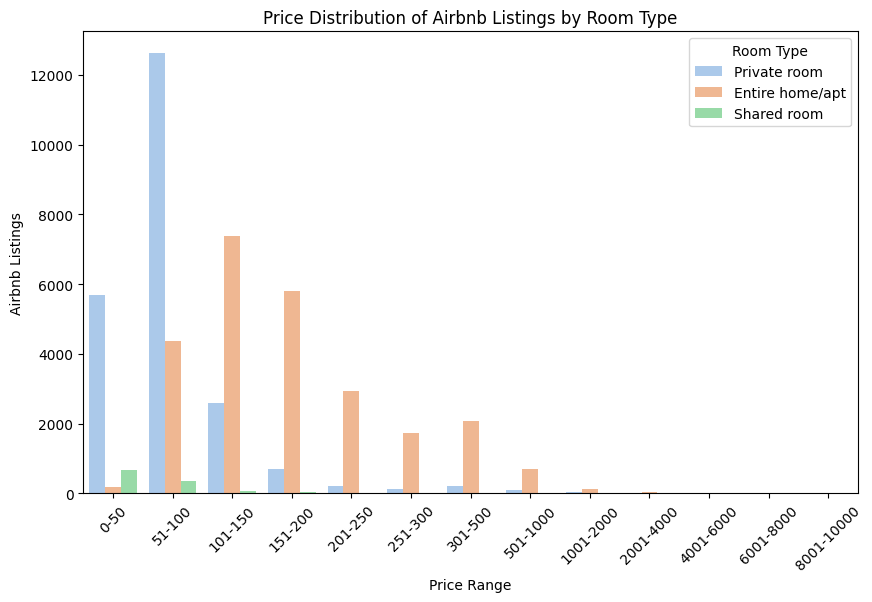

In [15]:
# Now let us separate the distinct categorical types of rentals and their data; shared room, private room, or the entire apartment.
df['room_type_encoded'], unique_room_types = pd.factorize(df['room_type'])

bins = [0, 50, 100, 150, 200, 250, 300, 500, 1000, 2000, 4000, 6000, 8000, 10000]
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-500', '501-1000', '1001-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000' ]

df['price_range'] = pd.cut(df['price'], bins=bins, labels=bin_labels)

# Filter for 'Private room' and 'Entire home/apt' only
filtered_df = df[df['room_type'].isin(['Shared Room', 'Private Room', 'Entire Home/Apt'])]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_range', hue='room_type_encoded', palette='pastel')

plt.legend(title='Room Type', labels=unique_room_types)
plt.xticks(rotation=45)
plt.title('Price Distribution of Airbnb Listings by Room Type')
plt.xlabel('Price Range')
plt.ylabel('Airbnb Listings')

plt.show()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

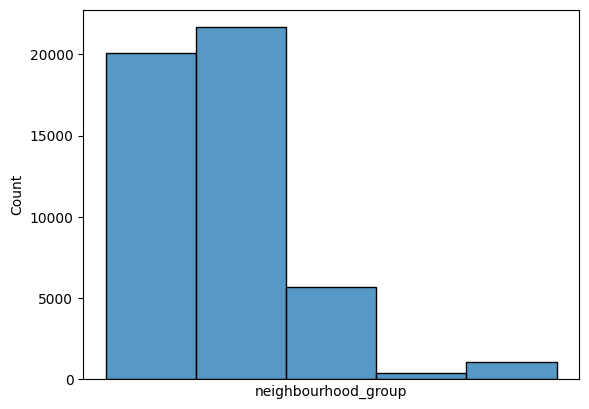

In [16]:
# Histogram of neighborhood groups
sns.histplot(data = df, x = "neighbourhood_group").set_xticks([])
# Where these properties are located throughout NY
df['neighbourhood_group'].value_counts()

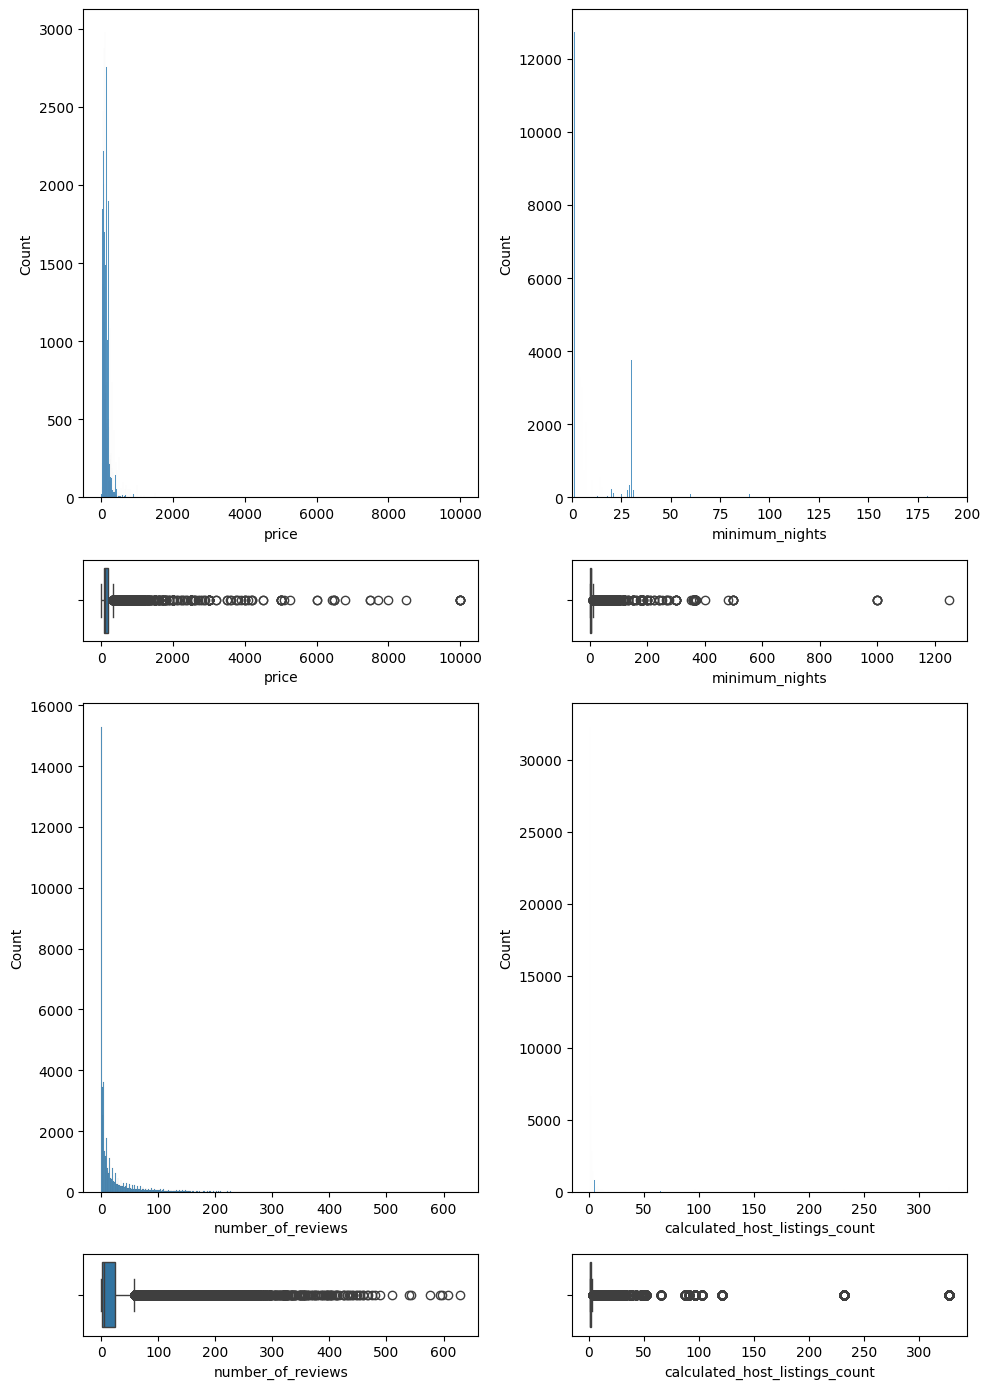

In [17]:
# Looking at some histograms and boxplot in regards to the numerical type variables

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

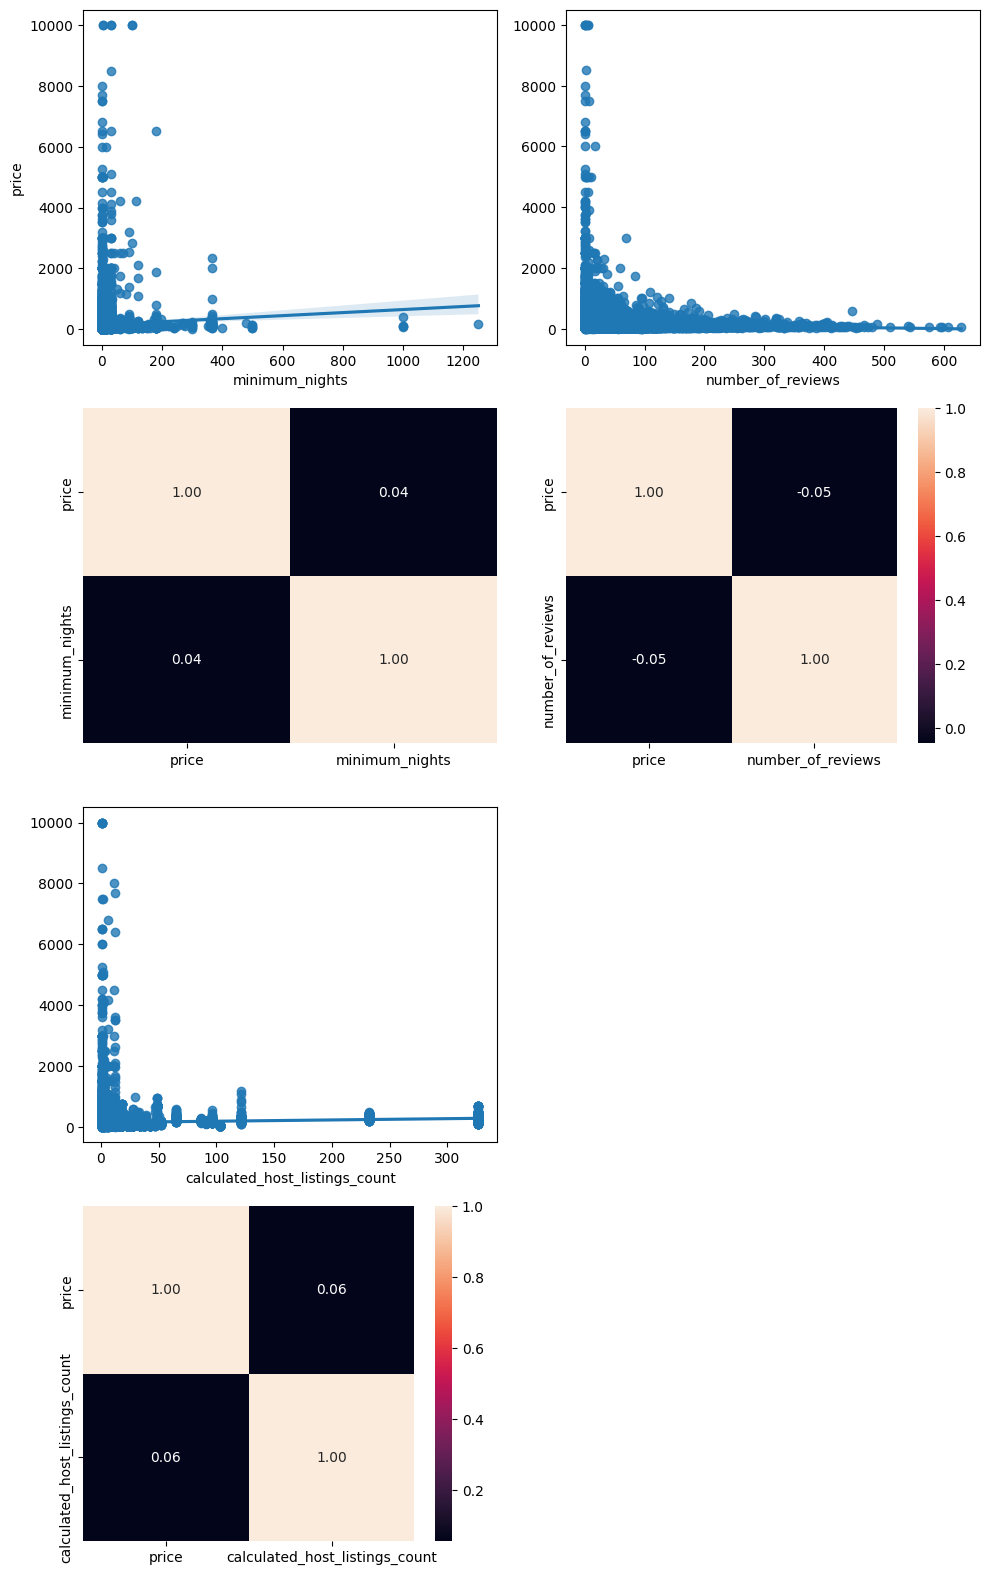

In [18]:
# Starting with some Numerical to Numerical Analysis to see if there is anything relevant

# Subplot similar to earlier dimensions
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Plotting and heatmaps to draw conclusions between these numeric variables
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

With values consistently in the .05 to .06 range whether postively or negatively, there is no correlation to speak of.  

Just some interesting things to note, you do not see any properties above 2000 in price with nearly as many reviews, simply assuming that those 
who can afford those places must be a considerably lower number of airbnb guests.  

Also, somewhat confusing that there are quite a few listings with 365 set as the minimum amount of nights and even 6 listing highter than that, with a couple even (assuming it the highest value allowed on the app) at 999.

The final comparison simply doesn't have anything in correlation whatsoever, as we say, garbage in, garbage out!


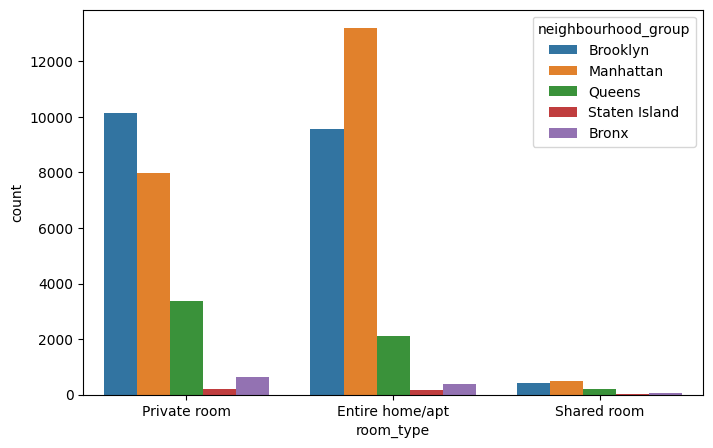

In [19]:
# What about the analysis between two Categorical subsets?

# set the parameters
fig, axis = plt.subplots(figsize = (8, 5))

# create a countplot to see where these listings are by type and including where in New York
sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

plt.show()

Taking a look at this countplot and a quick google search, I found it interesting to note that comparing the size of these areas of New York

** By area, Queens is the largest at 109 square miles, followed by Brooklyn (69 square miles), Staten Island (58 square miles), 
the Bronx (42 square miles) and Manhattan is the smallest at 23 square miles.**
** Population Density** (pop/mi.**2)
Queens: 22,069
Brooklyn: 39,652
Staten Island: 8,547
The Bronx: 25,321
Manhattan: 73,663

Now, it appears that Brooklyn edges out the total offerings over Manhattan by a small margin, thanks to the 10000+ private room offerings available.

Considerably less in 3rd, 4th, and 5th place we find Queens, The Bronx, and finally Staten Island respectively.

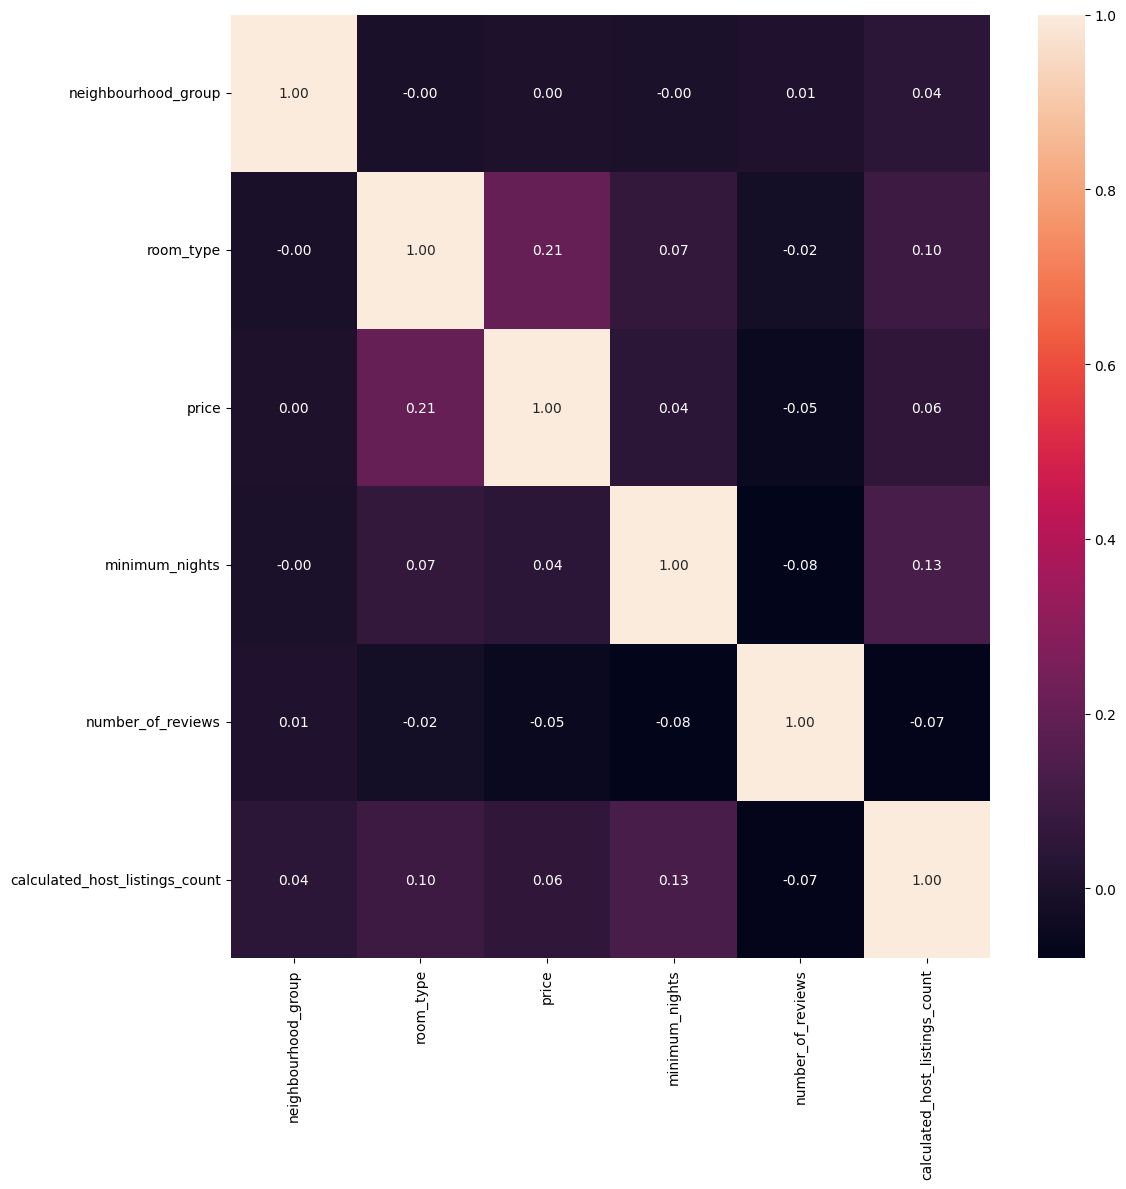

In [20]:
# Now we can explore some analysis between Numerical and Categorical

# We must factorize the Room Types and the Neighbourhood Group columns
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]

fig, axes = plt.subplots(figsize=(12, 12))

# heatmap to understand the correlation between each set of columns
sns.heatmap(total_data[["neighbourhood_group", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Quick analysis of this heatmap will tell you that there is minimal correlation to be drawn from these sets of variables.

The strongest correlation we see (although not that significat) is .21 with the relation between the listings price vs the type 
of room offered, which can be easily understood that as the bulk of available places goes up in price, 
they will tend towards becoming a private room and ultimately even more offerings yet as the entire apartment or home.

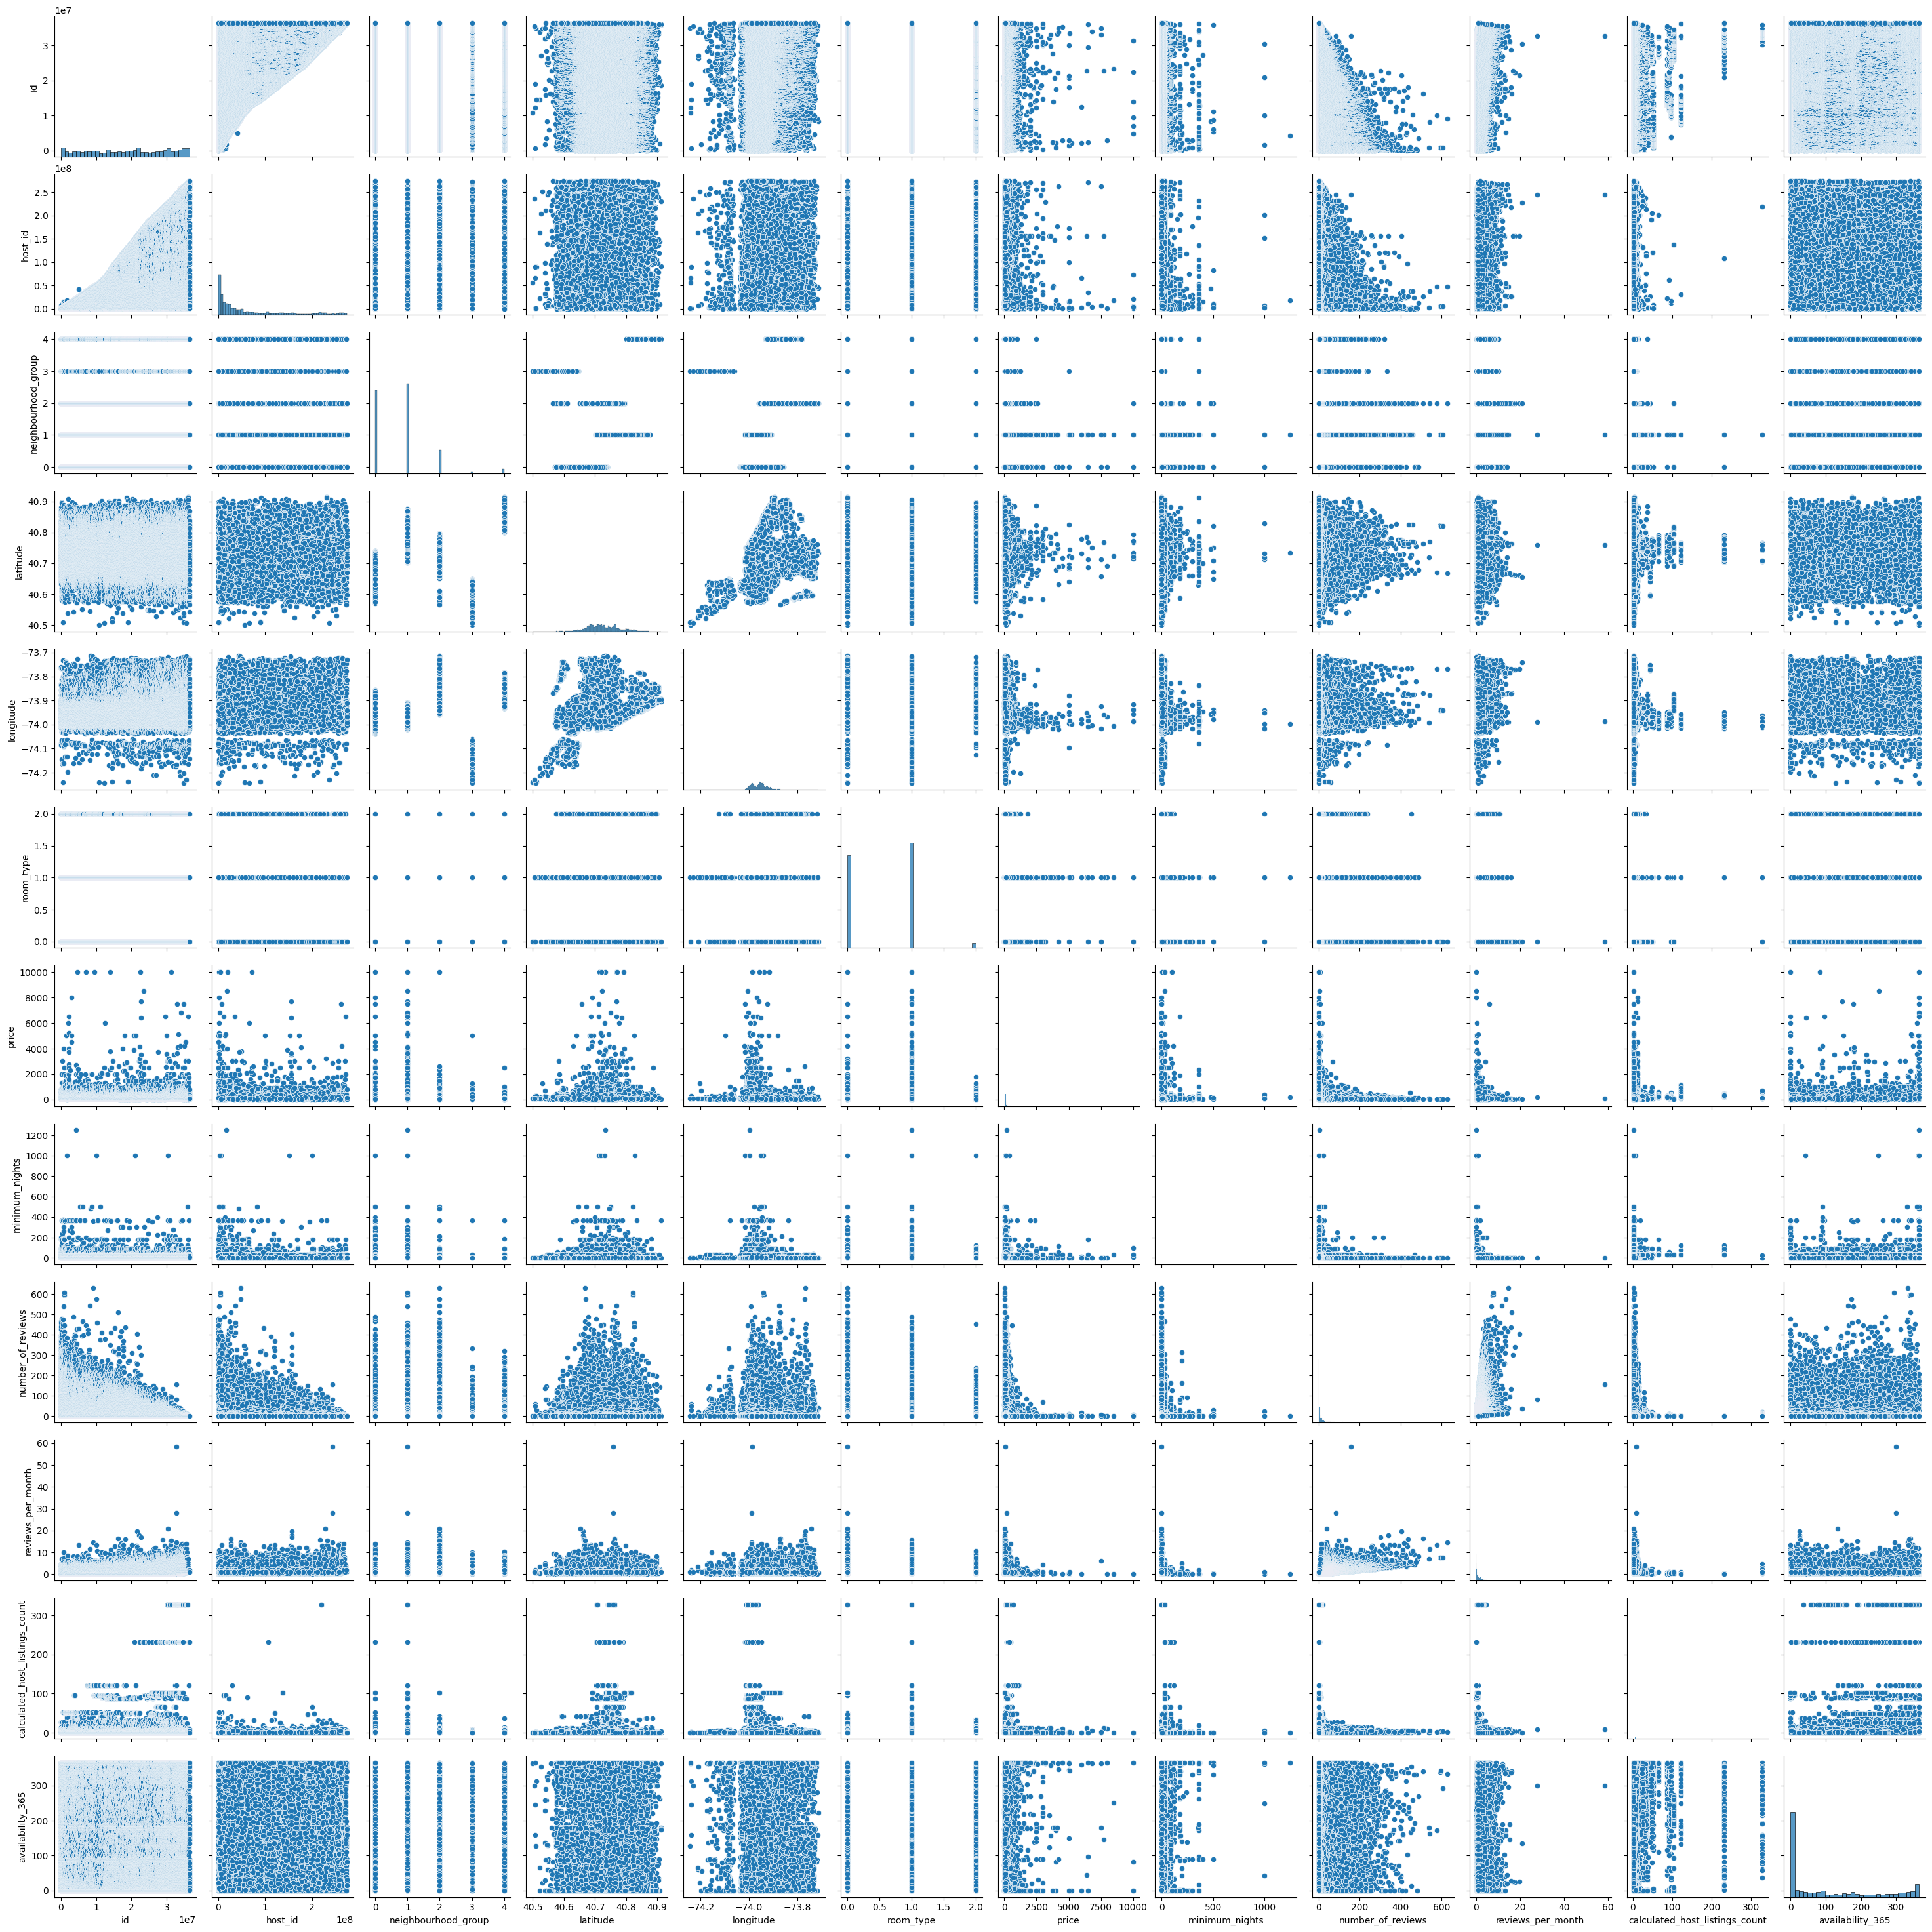

In [21]:
# To demonstrate all of the columns in being analyzed amongst themselves in one effective grid, we create a pairplot.  
# **WARNING, takes time and can be large quickly as columns increase!** (64 seconds in this case!)

sns.pairplot(data= total_data)

In [22]:
# Step 5: Feature Engineering
total_data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,0.786911,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.844386,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,0.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,1.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,1.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,4.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


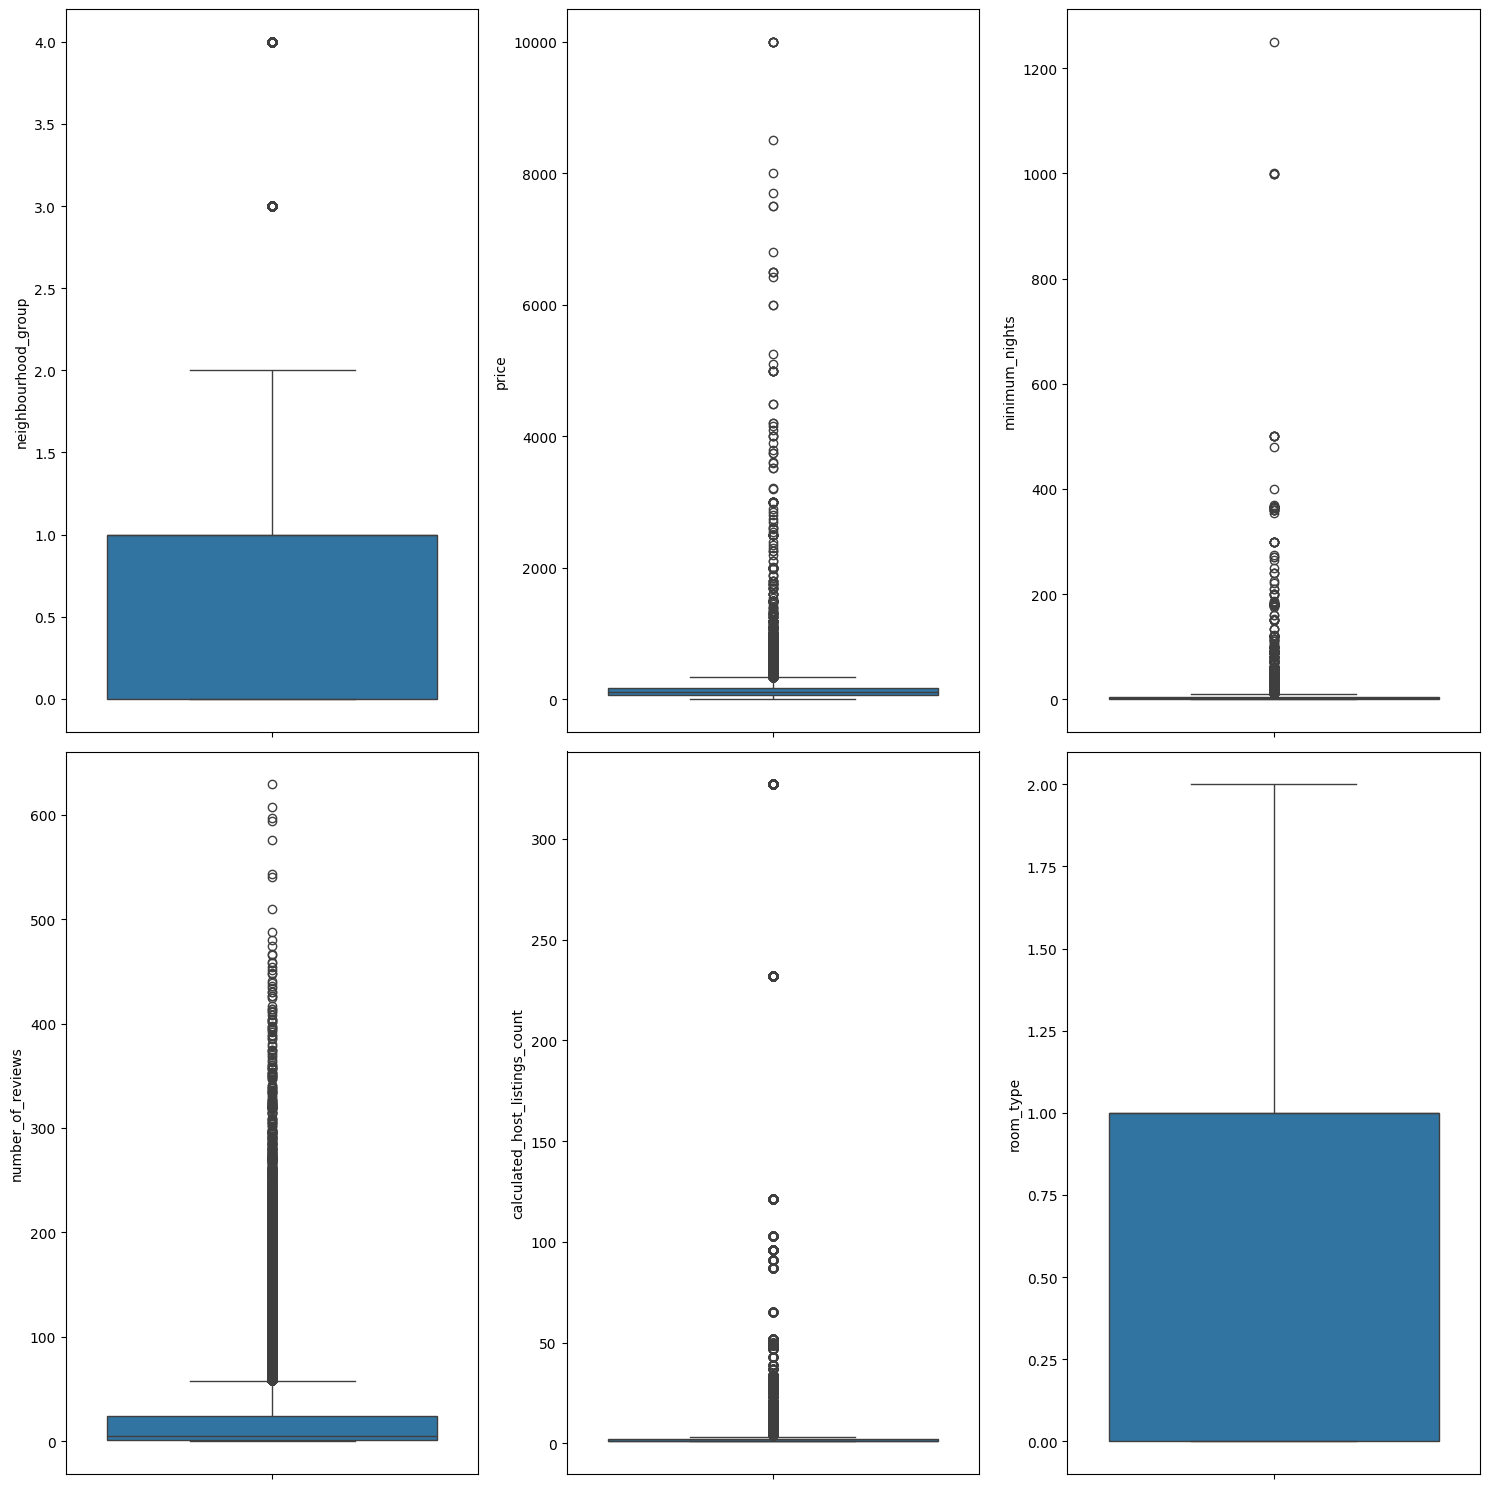

In [32]:
fig, axes = plt.subplots(2, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "room_type")

plt.tight_layout()
plt.show()

In [33]:
# Outlier Analysis, looking at the IQR (Interquartile Range) or the difference from the Q3 (75%) and the Q1 (25%)
# First we can look at the price values
overall_price_info = total_data['price'].describe()
print(overall_price_info)

# Upper and lower limits taken into account to determine where outliers are
price_iqr = overall_price_info["75%"] - overall_price_info["25%"]
upper_limit = overall_price_info["75%"] + 1.5 * price_iqr
lower_limit = overall_price_info["25%"] - 1.5 * price_iqr

print()
print(f"The upper limit is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, finally having an interquartile range of {round(price_iqr, 2)}")

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The upper limit is 334.0 and the lower limit is -90.0, finally having an interquartile range of 106.0


In [48]:
total_data = total_data[total_data['price'] > 0]


In [53]:
# How about for the minimum nights column
nights_stats = total_data["minimum_nights"].describe()

nights_iqr = nights_stats["75%"] - nights_stats["25%"]
upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an IQR of {round(nights_iqr, 2)}")


The upper and lower limits for outliers are 9.5 and -2.5, with an IQR of 3.0


In [56]:
# Same for # of reviews

review_stats = total_data["number_of_reviews"].describe()

review_iqr = review_stats["75%"] - review_stats["25%"]
upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

The upper and lower limits for finding outliers are 27.5 and -16.5, with an interquartile range of 11.0


In [57]:
# Also for the host listings count
hostlist_stats = total_data["calculated_host_listings_count"].describe()

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [58]:
# Since outliers are those that residea above 4 in the listings count
total_data = total_data[total_data["calculated_host_listings_count"] > 4]

In [60]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,neighbourhood_group,room_type,price
365,0.070866,0.011173,0.071429,0.00,0.0,599
496,0.236220,0.162011,0.018634,0.25,1.0,2000
637,0.338583,0.000000,0.018634,0.00,0.0,438
684,0.055118,0.011173,0.071429,0.00,0.0,599
1414,0.346457,0.162011,0.018634,0.25,1.0,1000


In [61]:
# Feature Selection

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,room_type
0,0.000000,0.162011,0.704969,1.0
1,0.000000,0.156425,1.000000,1.0
2,0.000000,0.005587,0.018634,0.0
3,0.015748,0.011173,0.136646,1.0
4,0.464567,0.162011,0.018634,1.0


In [66]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

X_test_sel

,number_of_reviews,minimum_nights,calculated_host_listings_count,room_type,price
0,0.023622,0.011173,0.021739,0.0,699
1,0.000000,0.162011,0.186335,1.0,550
2,0.000000,0.027933,0.006211,1.0,499
3,0.094488,0.011173,0.021739,0.0,499
4,0.062992,0.005587,1.000000,1.0,390
...,...,...,...,...,...
78,0.000000,0.162011,0.704969,1.0,356
79,0.062992,0.005587,1.000000,1.0,472
80,0.007874,0.162011,0.360248,1.0,369
81,0.102362,0.005587,1.000000,1.0,412
